# 1. 선 그래프 (Line plot) 그리기
## 1.1 선 그래프(꺽은선 그래프)
- 점과 점을 선으로 연결한 그래프
- 시간의 흐름에 따른 변화를 표현할 때 많이 사용한다. (시계열)
- `plot([x], y)` 
    - 1번인수 : x값(생략가능), 2번인수 y값
    - 인수가 하나인 경우 y 축의 값으로 설정되고 X값은 (0 ~ len(y)-1) 범위로 지정된다.
    - x와 y의 원소개수는 같아야 한다.
- 하나의 axes(subplot)에 여러 개의 선 그리기
    - 같은 axes에 plot()를 여러번 실행한다.

## 1.2 선 스타일
- https://matplotlib.org/3.0.3/gallery/lines_bars_and_markers/line_styles_reference.html

In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
x = np.linspace(1, 10, 100) # 1부터 10까지 100개의 숫자를 균일하게 생성

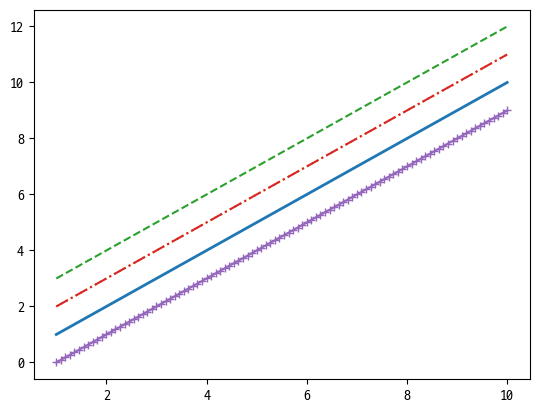

In [13]:
plt.plot(x, x, linewidth=2.0)       # 선의 굵기를 2.0으로 설정
plt.plot(x, x+1, linestyle=':')     # 점선(:)으로 그리기
plt.plot(x, x+2, linestyle='--')    # 파선(--)으로 그리기
plt.plot(x, x+1, linestyle='-.')    # 대쉬-닷선(-.)으로 그리기
plt.plot(x, x-1, marker='+')        # 마커(*) 모양으로 그리기

## 1.3 선 그래프 활용
- [서울시 연도별 황사 경보발령 현황](http://data.seoul.go.kr/dataList/datasetView.do?infId=OA-2227&srvType=S&serviceKind=1&currentPageNo=1)
- 연도별 관측일수와 황사최대농도의 변화를 그래프로 시각화

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv(r'./data/서울시 연도별 황사 경보발령 현황.csv')
df.shape

(12, 7)

In [5]:
df.head()

,년도,주의보 발령횟수,주의보 발령일수,경보 발령횟수,경보 발령일수,관측일수,최대농도(㎍/㎥/시)
0,2006,4,5,1,2,11,2941
1,2007,3,4,1,1,12,1355
2,2008,1,1,1,1,11,933
3,2009,2,3,2,3,9,1157
4,2010,4,5,2,3,15,1354


In [6]:
df_ = df.set_index('년도')
df_.rename(columns={r'최대농도(㎍/㎥/시)': '최대농도'}, inplace=True)
df_.head()

,주의보 발령횟수,주의보 발령일수,경보 발령횟수,경보 발령일수,관측일수,최대농도
년도,,,,,,
2006,4,5,1,2,11,2941
2007,3,4,1,1,12,1355
2008,1,1,1,1,11,933
2009,2,3,2,3,9,1157
2010,4,5,2,3,15,1354


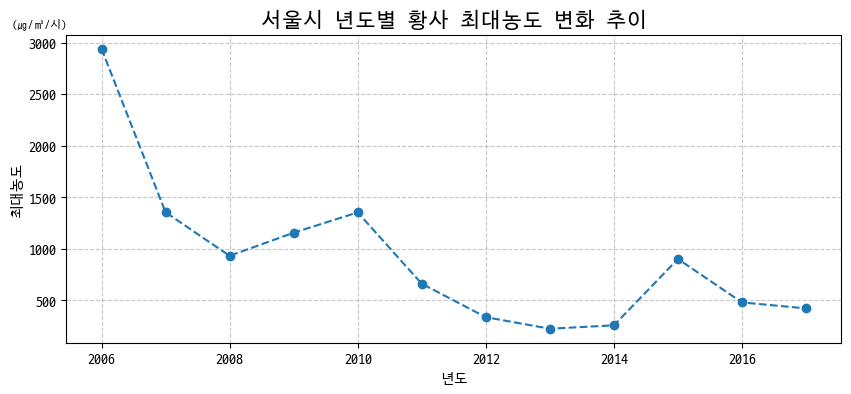

In [41]:
# 년도에 따른 최대농도 변화 추이
fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(1, 1, 1)
fig.text(0.07, 0.9, '(㎍/㎥/시)', fontsize=8)
ax.set_title('서울시 년도별 황사 최대농도 변화 추이', fontsize=15)
ax.set_xlabel('년도')
ax.set_ylabel('최대농도')
ax.grid(True, linestyle='--', alpha=0.7)
ax.plot(df_.index, df_['최대농도'], marker='o', linestyle='--')
plt.show()

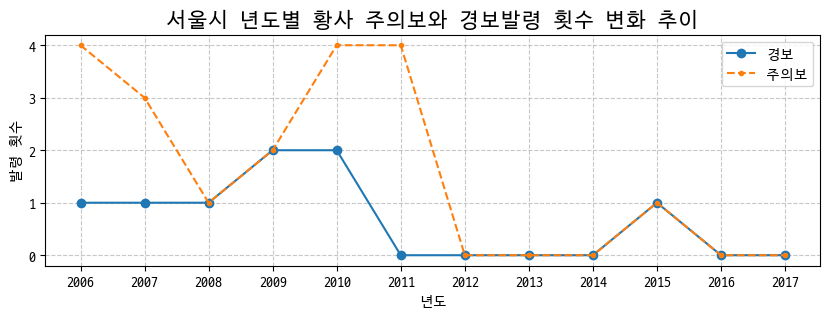

In [7]:
# 년도에 따른 주의보와 경보발령 횟수 변화 추이
fig = plt.figure(figsize=(10, 3))
ax = fig.add_subplot(1, 1, 1)
ax.set_title('서울시 년도별 황사 주의보와 경보발령 횟수 변화 추이', fontsize=15)
ax.set_xlabel('년도')
ax.set_ylabel('발령 횟수')
ax.set_xticks(df_.index)
ax.set_yticks(range(5))
ax.grid(True, linestyle='--', alpha=0.7)
ax.plot(df_.index, df_['경보 발령횟수'], marker='o', linestyle='-', label='경보')
ax.plot(df_.index, df_['주의보 발령횟수'], marker='.', linestyle='--', label='주의보')
ax.legend()
plt.show()

## 최대 농도와 관측일 수의 연도별 변화를 시각화
- ### 하나의 축을 공유하고 두개의 축을 가지는 그래프 그리기
- 값의 범위(Scale)이 다른 두 값과 관련된 그래프를 한 Axes(subplot)에 그리는 경우
- X축을 공유해 2개의 Y축을 가지는 그래프
    - axes.twinx() 를 이용해 axes를 복사
- Y축을 공유해 2개의 X축을 가지는 그래프
    - axes.twiny() 를 이용해 axes를 복사

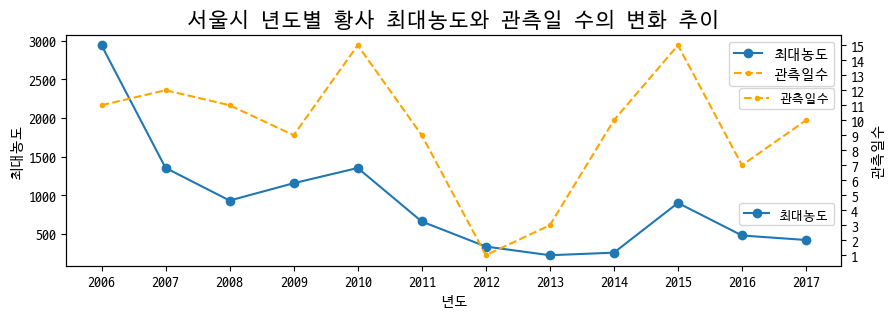

In [96]:
# 년도별 최대 농도와 관측일 수의 변화 추이
fig = plt.figure(figsize=(10, 3))
ax = fig.add_subplot(1, 1, 1)
ax.set_title('서울시 년도별 황사 최대농도와 관측일 수의 변화 추이', fontsize=15)
ax.set_xlabel('년도')
ax.set_xticks(df_.index)
ax.yaxis.tick_right()
ax.set_ylabel('최대농도')
ax.plot(df_.index, df_['최대농도'], marker='o', linestyle='-', label='최대농도')
ax_ = ax.twinx()            # x축을 공유하는 새로운 y축을 추가
ax_.set_ylabel('관측일수')
ax_.set_yticks(range(20))
ax_.plot(df_.index, df_['관측일수'], marker='.', linestyle='--', label='관측일수', c='orange')
# 범례 위치 조정
# 같은 axes가 아니기 때문에 각각의 범례를 따로 지정하거나 figure의 legend()를 사용할 수 있다.
fig.legend(bbox_to_anchor=(0.9, 0.88), loc='upper right',fontsize=10)

# bbox -> bounding box -> 범례 박스
# bbox_to_anchor=(x축 위치, y축 위치)로 범례 위치 조정
# x, y축은 왼쪽 아래가 (0, 0)이고 오른쪽 위가 (1, 1)이다.
# loc -> 범례 박스의 어느 부분을 기준으로 위치를 조정할 것인지 설정
ax.legend(bbox_to_anchor=(0.999, 0.15), fontsize=9, loc='lower right')
ax_.legend(bbox_to_anchor=(0.999, 0.65), fontsize=9, loc='lower right')
plt.show()

# 2. 산점도 (Scatter Plot) 그리기
## 2.1 산점도(산포도)
- X와 Y축을 가지는 좌표평면상 관측값들을 점을 찍어 표시하는 그래프
- 변수(Feature)간의 상관성이나 관측값들 간의 군집 분류를 확인할 수 있다.
- `scatter()` 메소드 사용
    - 1번인수 : x축 값, 2번인수 y축 값
    - x와 y값들을 모두 매개변수로 전달해야 한다.
        - x와 y의 원소의 수는 같아야 한다.
    - c/color: 색지정
        - c와 x, y와 같은 원소수를 가지는 Iterable 타입 객체로 설정할 경우 각 마커마다 다른 색상을 설정할 수 있다
    - s: 점 크기 지정
        

## 2.2 설정
- marker (마커)
    - marker란 점의 모양을 말하며 미리정의된 값으로 변경할 수있다.
    - scatter() 메소드의 marker 매개변수를 이용해 변경한다. 
    - https://matplotlib.org/stable/api/markers_api.html
- s
    - 정수: 마커의 크기
- alpha    
    - 하나의 마커에 대한 투명도
    - 0 ~ 1 사이 실수를 지정 (default 1)

## 2.3 산점도 활용

###  캐럿(carat)과 가격(Price)간의 상관관계 시각화

> - 상관계수 
>     - 두 변수간의 상관관계(비례/반비례)를 정량적(수치적)으로 계산한 값.
>         - 양수: 양의 상관관계(비례관계), 음수: 음의 상관관계(반비례관계)
>             - 양: 0 ~ 1,  음: -1 ~ 0
>         - 절대값 기준 1로 갈수록 강한상관관계, 0으로 갈수록 약한 상관관계
>             - 1 ~ 0.7: 아주 강한 상관관계
>             - 0.7 ~ 0.3 : 강한 상관관계
>             - 0.3 ~ 0.1 : 약한 상관관계
>             - 0.1 ~ 0 : 관계없다.

# 3. 막대그래프 (Bar plot) 그리기
## 3.1 막대그래프(Bar plot)

- 수량/값의 크기를 비교하기 위해 막대 형식으로 나타낸 그래프
- 범주형 데이터의 class별 개수를 확인할 때 사용
- bar(x, height) 메소드 사용
    - x : x값, height:  막대 높이
        - X는 분류값, height는 개수
- barh(y, width) 메소드
    - 수평막대 그래프
    - 1번인수: y값, 2번인수: 막대 너비  
- 매개변수
    - 첫번째: 수량을 셀 대상
    - 두번째: 수량

## 3.2 막대그래프 활용
- [강수량추이](http://www.index.go.kr/potal/main/EachDtlPageDetail.do?idx_cd=1401)